# YOLO_V8 for custom label detection - Police detection

## Installation of YOLO V8 from Ultralytics

In [15]:
!nvidia-smi

Thu Dec 14 20:11:33 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      2MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
!pip install ultralytics

## Import YOLO_V8

In [17]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 27.6/166.8 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.30GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


## Train YOLO_V8 Model on Custom dataset

In [18]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PNOLaWtQd9CO1PVSCXwe")
project = rf.workspace("thomas-royb3").project("police_detection")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to police_detection-1 in yolov8:: 100%|██████████| 188/188 [00:00<00:00, 5403.25it/s]


In [20]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/police_detection-1/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/police_detection-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

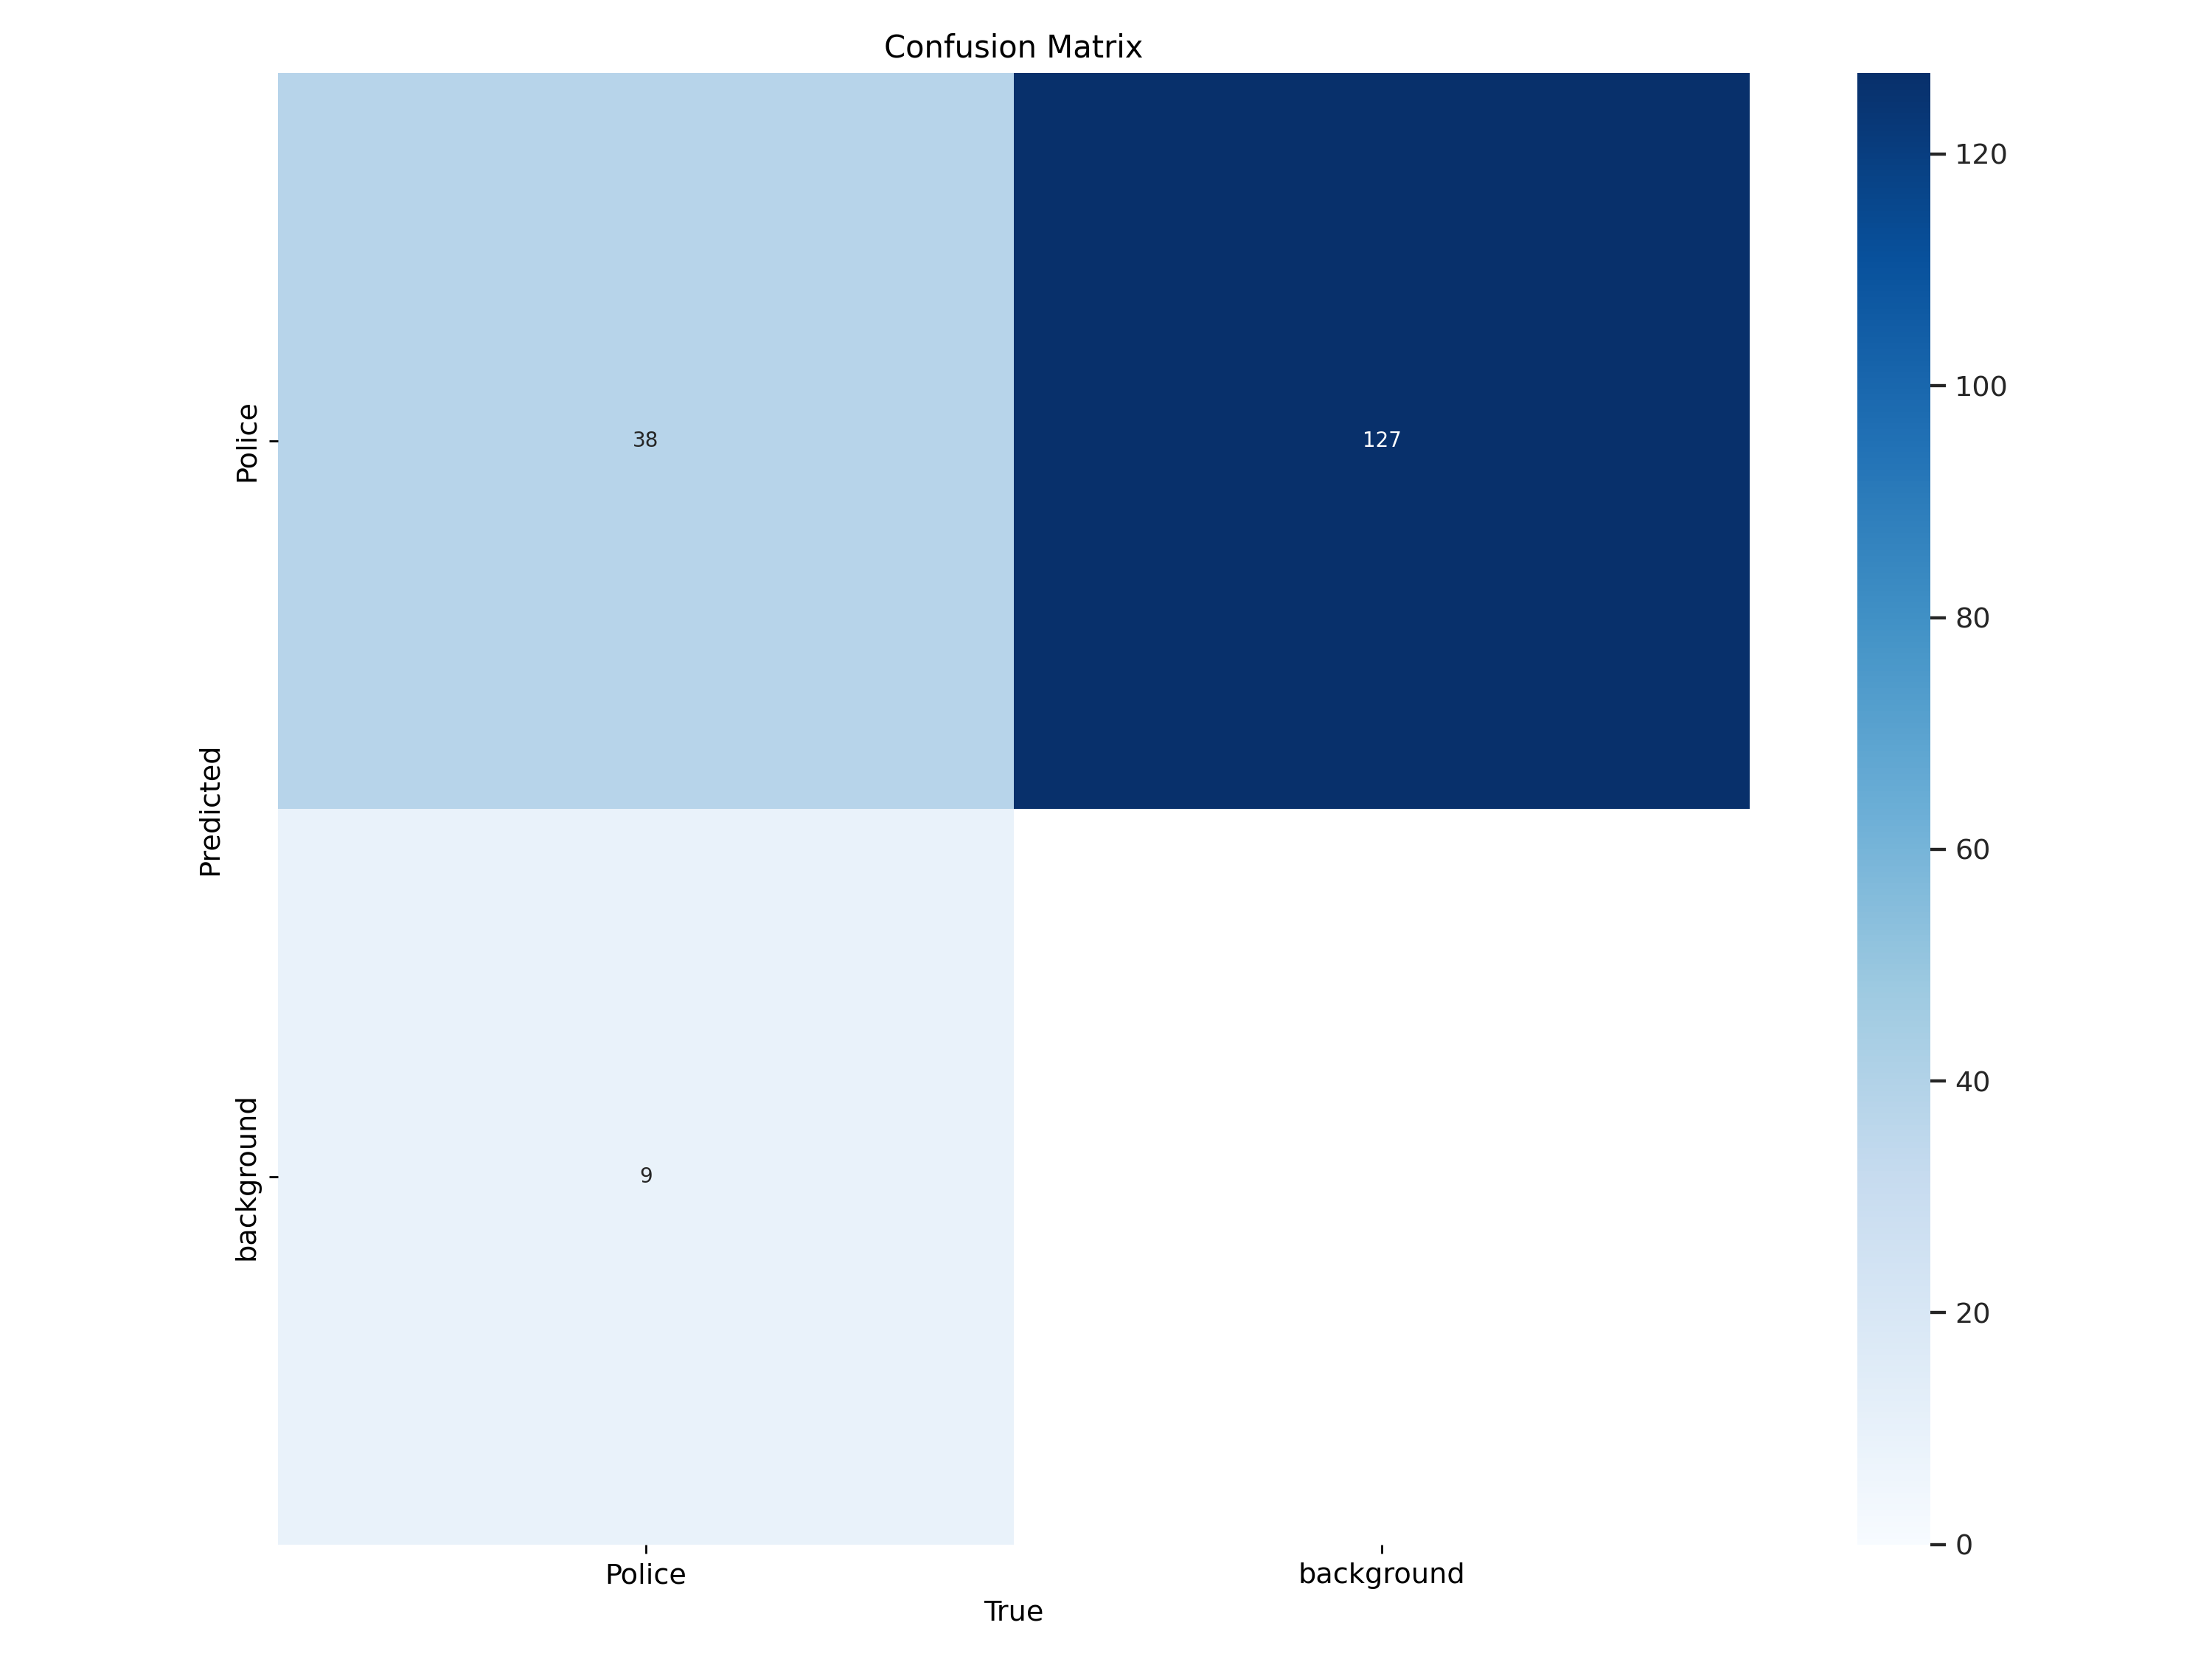

In [10]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', height=600)

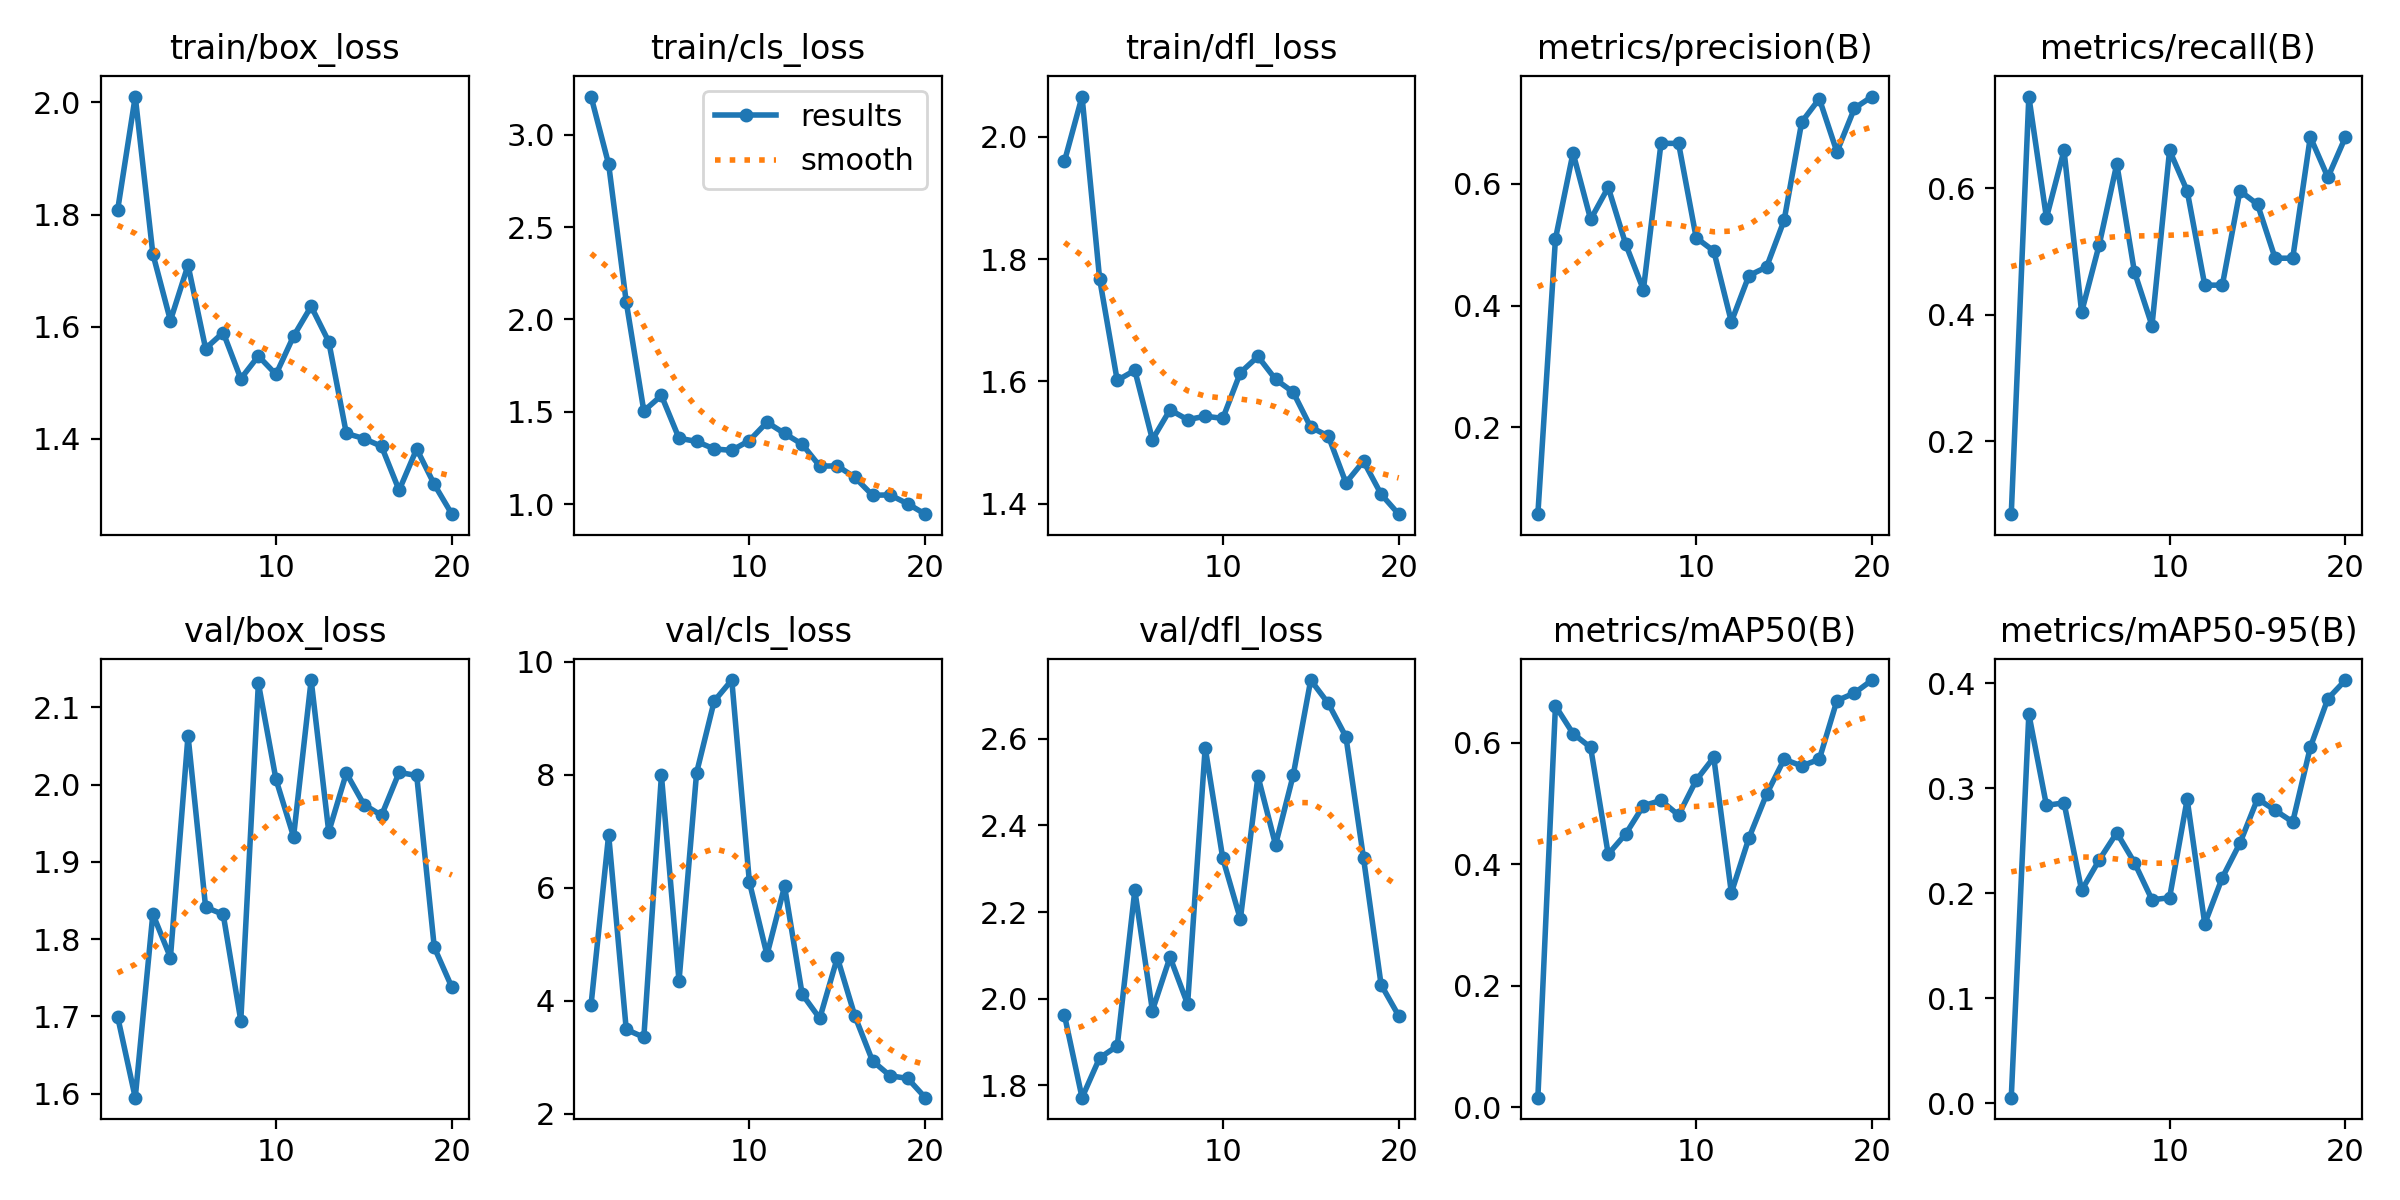

In [11]:
Image(filename=f'/content/runs/detect/train/results.png', height=600)

In [8]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/police_detection-1/data.yaml

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/police_detection-1/valid/labels.cache... 17 images, 0 backgrounds, 0 corrupt: 100% 17/17 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.09s/it]
                   all         17         47      0.744       0.68      0.703      0.406
Speed: 4.3ms preprocess, 64.5ms inference, 0.0ms loss, 8.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [13]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.8 source=/content/police_detection-1/test/images

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/9 /content/police_detection-1/test/images/image11_jpg.rf.8c0771ea7573884c5a634e96753c47e3.jpg: 640x640 1 Police, 9.1ms
image 2/9 /content/police_detection-1/test/images/image20_jpg.rf.73af87b74c0d779003cb76a2acbeb8d9.jpg: 640x640 2 Polices, 9.1ms
image 3/9 /content/police_detection-1/test/images/image32_jpg.rf.a9efe6cdcb755a993f424cffed03e33b.jpg: 640x640 2 Polices, 9.1ms
image 4/9 /content/police_detection-1/test/images/image75_jpg.rf.3f3ffcc8e361ba5881fc682b55513064.jpg: 640x640 3 Polices, 9.1ms
image 5/9 /content/police_detection-1/test/images/image77_jpg.rf.8351cd79960c05d9a3ae37d8fca95aa0.jpg: 640x640 11 Polices, 9.0ms
image 6/9 /content/police_detection-1/test/images/image83_jpg.rf.f49fd2189e4af268a2b5a90900930d2f.jpg: 640x640 3 Polices, 9.0ms
image 7/9 /content/police_detection-1/test/images/

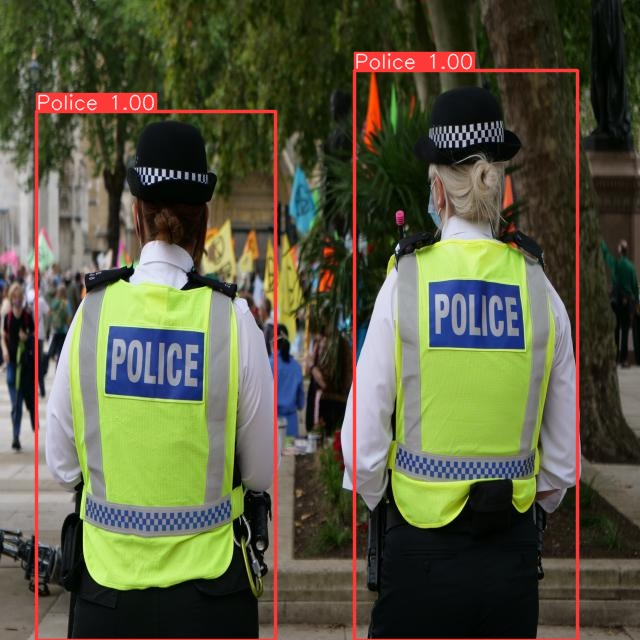

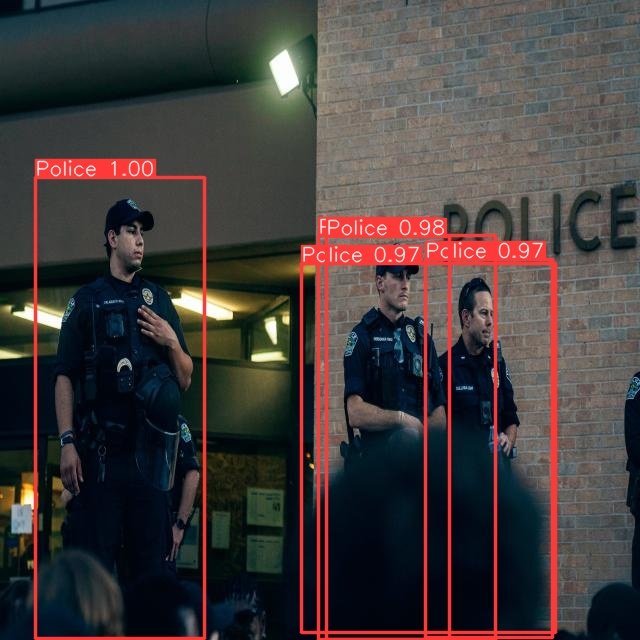

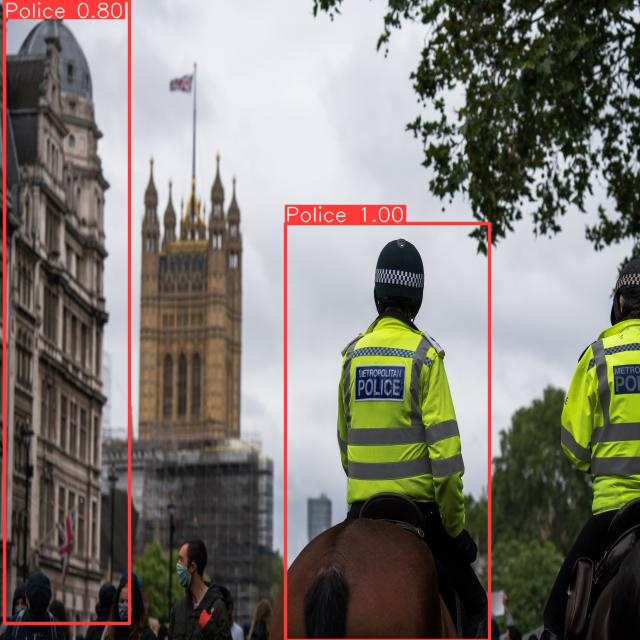

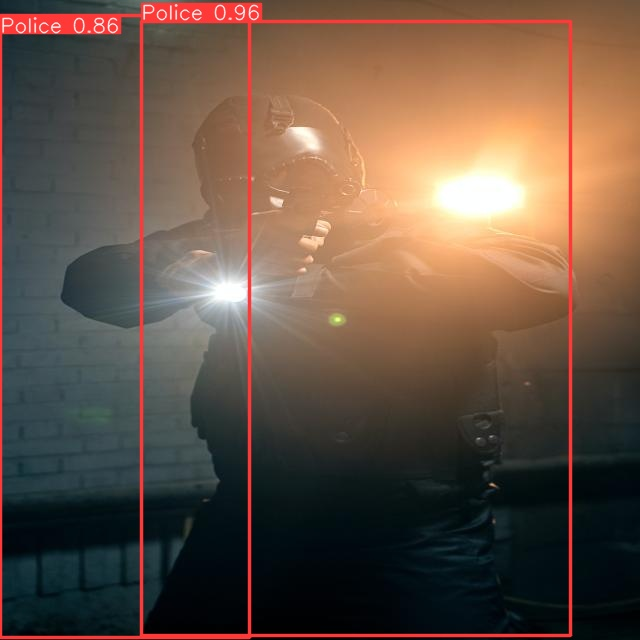

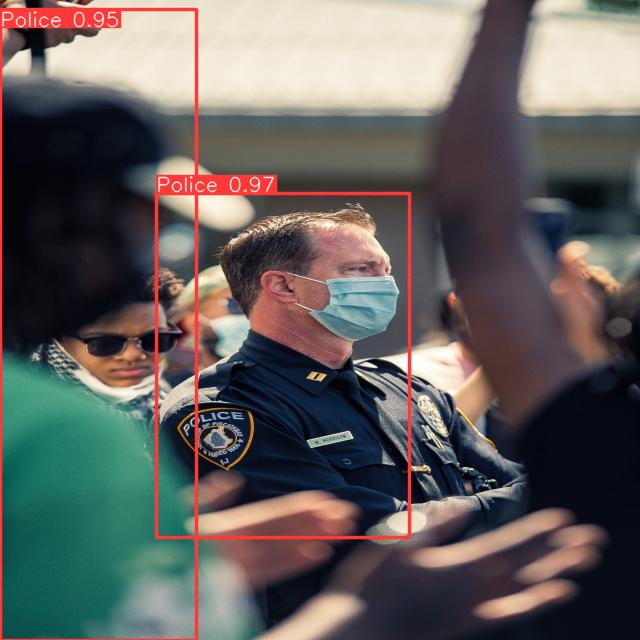

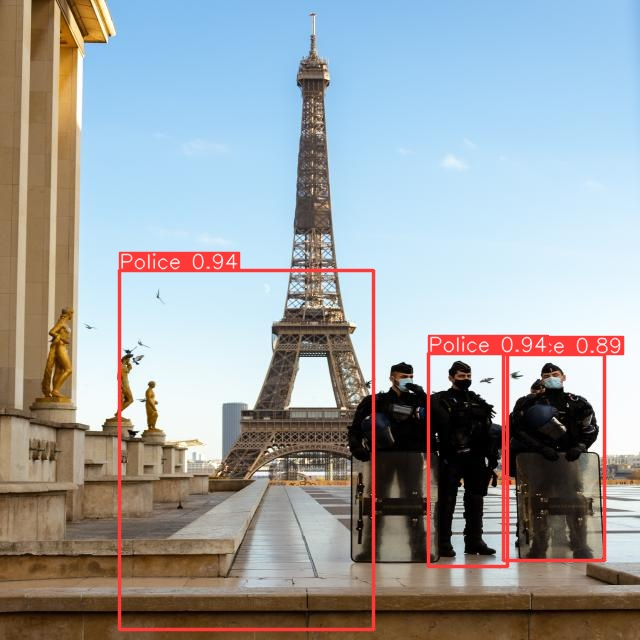

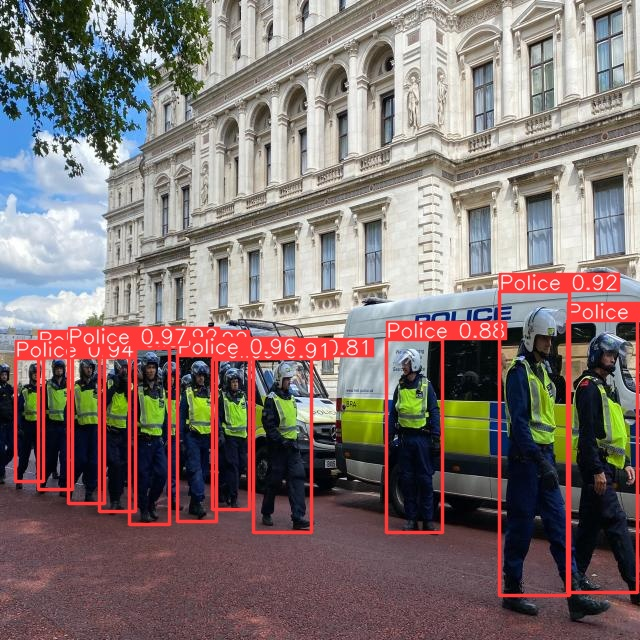

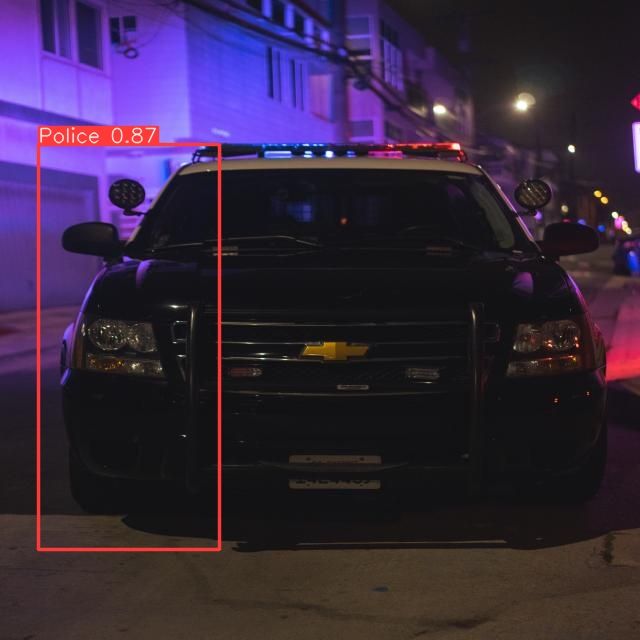

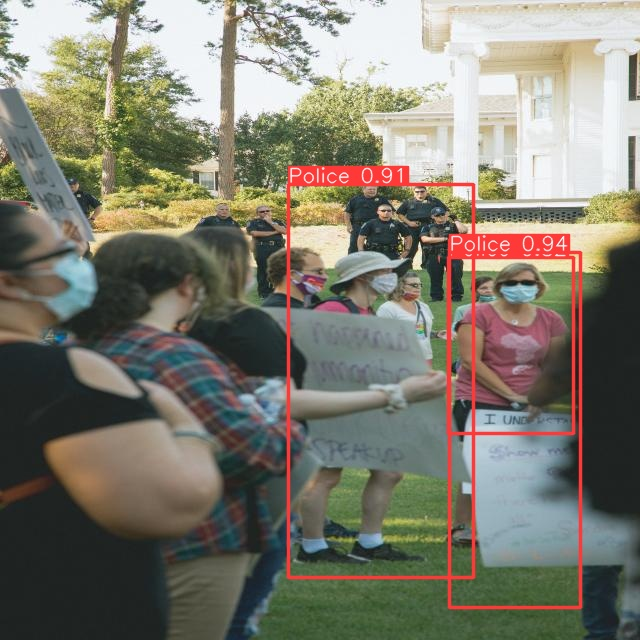

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
